# **Algoritmo de Simon**

In [ ]:
#!pip install qiskit
#!pip install pylatexenc
#!pip install qiskit-aer

El problema de Simon se centra en una función $f: \{0,1\}^n \to \{0,1\}^n$ que cumple con una propiedad específica,

para algún patrón oculto $s \in \{0,1\}^n$, se tiene que:

$f(x) = f(y) \iff x \oplus y = s$

donde $\oplus$ es la operación XOR bit a bit. Esto implica que $f(x)$ es ``2-a-1", es decir, hay pares de entradas $x, y$ tales que producen el mismo valor de salida, y la diferencia entre estas entradas siempre es $s$. 
El objetivo es encontrar el patrón $s$ usando la menor cantidad de consultas a $f(x)$.



El **algoritmo de Simon** utiliza los principios de superposición y entrelazamiento para encontrar $s$ de manera eficiente:

- **Preparación del estado:** Se inicia con $n$ qubits en el estado $|0\rangle$, aplicando puertas Hadamard para generar una superposición de todos los posibles valores $x$.
- **Evaluación de la función:** Se utiliza un oráculo cuántico $U_f$ que implementa la función $f(x)$, entrelazando el estado de los qubits de entrada y salida.
- **Medición parcial:** Se mide el registro de salida, colapsando el registro de entrada a una superposición de valores $x$ que producen la misma salida.
- **Hadamard inverso:** Se aplica la puerta Hadamard nuevamente a los qubits de entrada, lo que transforma la superposición en un sistema de ecuaciones lineales sobre $s$.
- **Medición final:** Se mide el registro de entrada, obteniendo vectores linealmente independientes que permiten deducir $s$ mediante álgebra clásica.

El algoritmo encuentra $s$ con alta probabilidad tras $O(n)$ consultas al oráculo, mucho más rápido que el método clásico.


En un enfoque clásico, encontrar $s$ requeriría verificar todas las posibles entradas $x$ y $y$ hasta encontrar un par tal que $f(x) = f(y)$, lo que necesita $O(2^{n/2})$ consultas en promedio (porque es un problema de búsqueda). Por otro lado, el algoritmo de Simon resuelve el problema en $O(n)$ consultas, mostrando una **ventaja exponencial cuántica**. 



- **Aplicabilidad limitada:** El problema de Simon es teórico y tiene poca relevancia directa en aplicaciones prácticas sin embargo es un precursor de algoritmos más útiles, como el de Shor.

- **Dependencia del oráculo:** Como muchos algoritmos cuánticos, requiere un oráculo cuántico que implemente $f(x)$, lo cual puede 
ser difícil  de construir.

- **Resistencia a errores:** Como todos los algoritmos cuánticos, es sensible al ruido, lo que dificulta su 
implementación en hardware cuántico actual.


A pesar de estas limitaciones, el algoritmo de Simon es pionero en la computación cuántica, ya que establece las bases para explotar la superposición y el entrelazamiento para resolver problemas más rápido que los métodos clásicos.

## **Implementación en Qiskit**

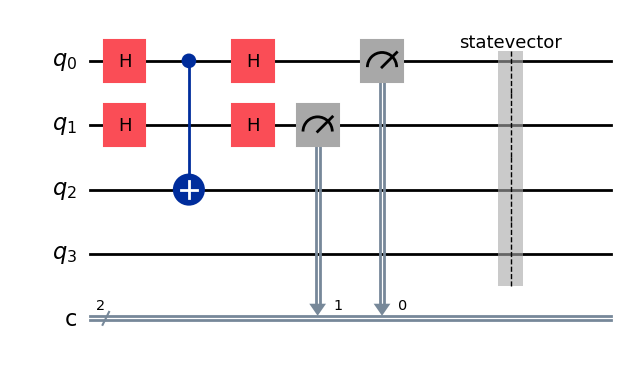

In [ ]:
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.result import marginal_distribution
import numpy as np



# Funcion que implementa el oraculo de Simon
def simon_oracle(circuit, n, s):
    """
    Implementa el oraculo de Simon para una cadena s en el circuito.
    """
    for i, bit in enumerate(s):
        if bit == '1':
            circuit.cx(i, n + i)

# Configuracion del problema
n = 2  # Numero de qubits en el registro de entrada
s = '10'  # Patron oculto

# Construccion del circuito cuantico
qc = QuantumCircuit(2 * n, n)

# Paso 1: Aplicar Hadamard a los qubits de entrada
qc.h(range(n))

# Paso 2: Aplicar el oraculo
simon_oracle(qc, n, s)

# Paso 3: Aplicar Hadamard inverso
qc.h(range(n))

# Paso 4: Medir los qubits en el registro de entrada
qc.measure(range(n), range(n))

# Visualizacion del circuito
#print(qc.draw('text'))
qc.save_statevector()
qc.draw('mpl')




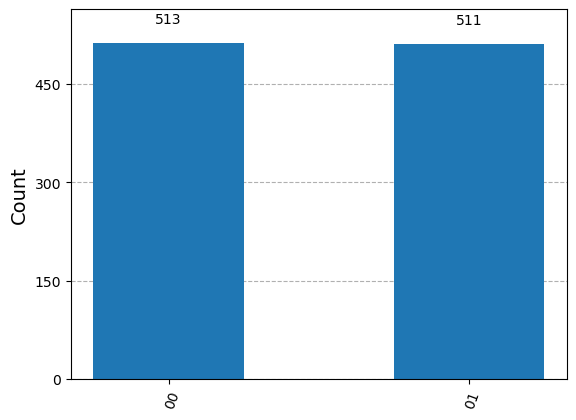

In [27]:
backend =  AerSimulator(method='statevector')

job = backend.run(qc,shots=1024)

resultados = job.result()
counts = resultados.get_counts()
plot_histogram(counts)



### **Resultados**

Como podemos observar en la ejecucion anterior, el algoritmo de Simon ha encontrado el valor esperado de s = 10, notemos
como es que este pudo habernos devuelto 00, 11 o 01, sin embargo, el algoritmo de Simon nos devolvio lo que estabamos buscando.


<br>
<a href=https://www.youtube.com/watch?v=dQw4w9WgXcQ>
<img src=https://media2.giphy.com/media/v1.Y2lkPTc5MGI3NjExeG4zOTViaHBwa2FzN3Z3Z2p3NnZzenRpcmJsNnJ1dml5eGQzbHVodCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/13twUEuUnCrEju/giphy.webp >
</a> 
<br>